<a href="https://colab.research.google.com/github/Kyaw-Zaw-Hlyan/ai-project/blob/main/polymer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

def get_user_input(properties):
    user_input = {}
    for prop in properties:
        while True:
            value = input(f"Enter desired {prop} (or press Enter to skip): ")
            if value == "":
                break
            try:
                user_input[prop] = float(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    while True:
        try:
            k = int(input("How many nearest polymers do you want to see? "))
            if k > 0:
                break
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
    return user_input, k

def load_data(file_path):
    df = pd.read_excel(file_path)
    return df

def preprocess_data(df):
    # Drop rows with any missing values
    df.dropna(inplace=True)
    return df

def validate_input(user_input, df):
    for key in user_input:
        if key not in df.columns:
            print(f"{key} is not a valid property in the dataset.")
            return False
        if user_input[key] < df[key].min() or user_input[key] > df[key].max():
            print(f"Impossible to find in such range for {key}. Please check your input.")
            return False
    return True

def find_nearest_polymers(user_input, df, k):
    properties = list(user_input.keys())
    user_values = np.array([user_input[prop] for prop in properties]).reshape(1, -1)

    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(df[properties])

    distances, indices = knn.kneighbors(user_values)
    nearest_polymers = df.iloc[indices[0]]
    return nearest_polymers

def main():
    file_path = "/content/ai project data.xlsx"  # Path to your CSV file
    df = load_data(file_path)

    properties = df.columns.tolist()
    if 'Material' in properties:
        properties.remove('Material')  # Assuming 'Material' is the name of the polymer

    df = preprocess_data(df)

    print("Available properties:", properties)

    user_input, k = get_user_input(properties)

    if not validate_input(user_input, df):
        return

    nearest_polymers = find_nearest_polymers(user_input, df, k)
    print("\nNearest polymers based on your input:")
    print(nearest_polymers)

if __name__ == "__main__":
    main()


Available properties: [' Modulus of Elasticity (GPA)', 'Yield strenght (Mpa)', 'Coefficient of Thermal Expansion', 'Tensile Strength(MPA)', 'Thermal Conductivity (W/m-K)', 'Specific Heat(J/kg-K)', 'Density(g/cm^3)', 'Cost(Raw)$/kg']
Enter desired  Modulus of Elasticity (GPA) (or press Enter to skip): 2.38
Enter desired Yield strenght (Mpa) (or press Enter to skip): 62
Enter desired Coefficient of Thermal Expansion (or press Enter to skip): 122
Enter desired Tensile Strength(MPA) (or press Enter to skip): 67
Enter desired Thermal Conductivity (W/m-K) (or press Enter to skip): 0.2
Enter desired Specific Heat(J/kg-K) (or press Enter to skip): 840
Enter desired Density(g/cm^3) (or press Enter to skip): 1.2
Enter desired Cost(Raw)$/kg (or press Enter to skip): 2.9
How many nearest polymers do you want to see? 3

Nearest polymers based on your input:
                             Material  Modulus of Elasticity (GPA)  \
1                   Polycarbonate(PC)                         2.38   
9  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Available properties: [' modulus_of_elasticity', 'yield_strength', 'tensile_strength', 'thermal_conductivity', 'specific_heat', 'density', 'cost/kg']


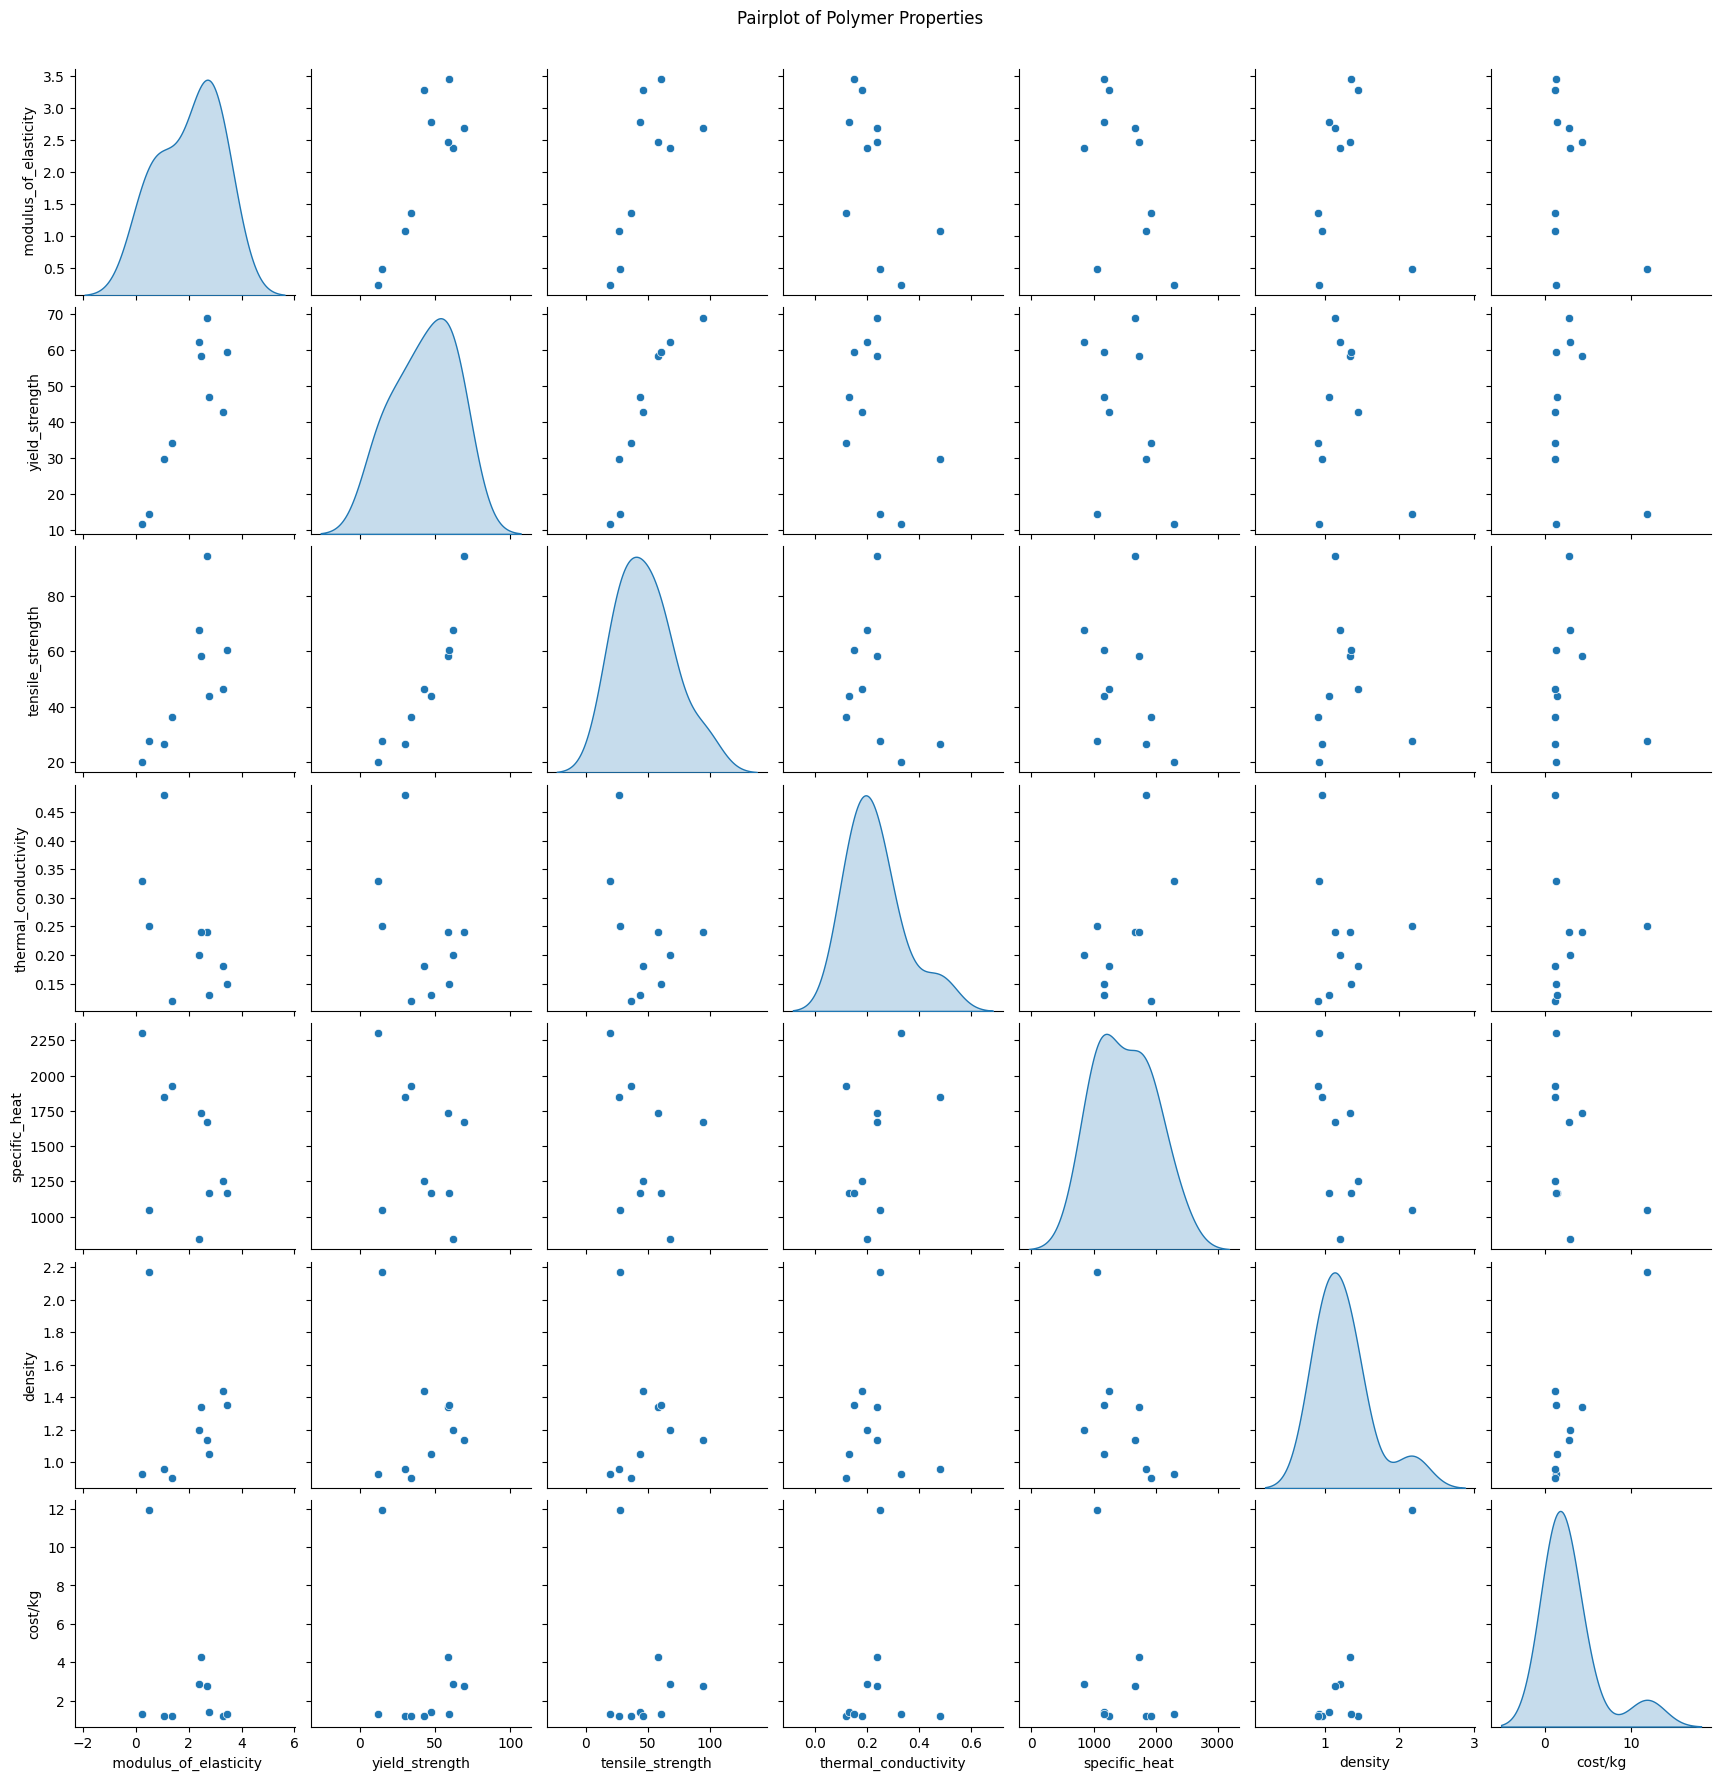

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

def get_user_input(properties):
    user_input = {}
    for prop in properties:
        while True:
            value = input(f"Enter desired {prop} (or press Enter to skip): ")
            if value == "":
                break
            try:
                user_input[prop] = float(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    while True:
        try:
            k = int(input("How many nearest polymers do you want to see? "))
            if k > 0:
                break
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
    return user_input, k

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    # Drop rows with any missing values
    df.dropna(inplace=True)
    return df

def validate_input(user_input, df):
    for key in user_input:
        if key not in df.columns:
            print(f"{key} is not a valid property in the dataset.")
            return False
        if user_input[key] < df[key].min() or user_input[key] > df[key].max():
            print(f"Impossible to find in such range for {key}. Please check your input.")
            return False
    return True

def find_nearest_polymers(user_input, df, k):
    properties = list(user_input.keys())
    user_values = np.array([user_input[prop] for prop in properties]).reshape(1, -1)

    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(df[properties])

    distances, indices = knn.kneighbors(user_values)
    nearest_polymers = df.iloc[indices[0]]
    return nearest_polymers

def plot_data(df):
    sns.pairplot(df, diag_kind='kde')
    plt.suptitle('Pairplot of Polymer Properties', y=1.02)
    plt.show()

def main():
    file_path = "/content/Polymer-predict (1).csv"  # Path to your CSV file
    df = load_data(file_path)

    properties = df.columns.tolist()
    if 'Material' in properties:
        properties.remove('Material')  # Assuming 'Material' is the name of the polymer

    df = preprocess_data(df)

    print("Available properties:", properties)

    plot_data(df)  # Plot data distributions

    user_input, k = get_user_input(properties)

    if not validate_input(user_input, df):
        return

    nearest_polymers = find_nearest_polymers(user_input, df, k)
    print("\nNearest polymers based on your input:")
    print(nearest_polymers)

if __name__ == "__main__":
    main()
